<a href="https://colab.research.google.com/github/GusSampaio/Classificacao_Multirrotulo_no_Dominio_Juridico/blob/main/Minera%C3%A7%C3%A3o_de_Textos_para_Dom%C3%ADnio_Jur%C3%ADdico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Extensionista - Classificação Multirrótulo no Domínio Jurídico

O objetivo deste projeto é desenvolver uma solução de classificação multirrótulo aplicada ao domínio jurídico. Em particular, trabalharemos com processos que podem estar associados a múltiplos assuntos, o que exige uma abordagem específica para lidar com esse tipo de dados.

## Objetivo do Projeto

Desenvolver modelos de classificação multirrótulo para classificar automaticamente processos jurídicos em diferentes categorias de assuntos. Isso é especialmente útil no contexto jurídico, onde um único processo pode estar relacionado a múltiplos temas (rótulos), como "contratos", "direito do consumidor" ou "tributação".

## Estrutura e Requisitos do Projeto

Vocês receberão os seguintes conjuntos de dados para desenvolver e testar suas soluções:

1. **X_train**: Conjunto de dados de treinamento contendo os textos dos processos.
2. **Y_train**: Conjunto de rótulos de treinamento indicando os assuntos associados a cada processo em `X_train`.

### Tarefas para os Grupos

1. **Pré-processamento**: Experimentar e avaliar diferentes técnicas de pré-processamento para preparar os textos dos processos jurídicos para os modelos de classificação. Técnicas recomendadas incluem:
   - Tokenização
   - Remoção de stopwords
   - Stemming
   - TF-IDF
   - Text Embeddings

2. **Divisão de Validação**: Gerar um conjunto de validação a partir de uma amostra de `X_train` para avaliar o desempenho dos modelos de classificação durante o desenvolvimento.

3. **Modelagem**: Explorar e testar diferentes algoritmos de classificação multirrótulo para identificar quais funcionam melhor neste domínio.

4. **Avaliação**: Avaliar os modelos utilizando métricas de classificação multirrótulo, com destaque para a F1-Score weighted, que será a métrica principal para identificar o modelo com melhor desempenho.

## Próximas Etapas e Dados Finais

Em breve, disponibilizaremos os conjuntos **X_test** e **Y_test**. Esses dados deverão ser usados para testar o desempenho final dos modelos de cada grupo.

## Apresentação e Premiação

Os melhores modelos serão selecionados para uma apresentação final. O grupo com o modelo que obtiver o melhor desempenho em termos de F1-Score weighted receberá um prêmio simbólico em reconhecimento ao seu trabalho!

## Dicas para o Projeto

- **Documentação**: Mantenham registros detalhados das etapas de pré-processamento e modelagem para facilitar o ajuste dos modelos.
- **Exploração de Modelos**: Experimentem diferentes abordagens e ajustem hiperparâmetros para otimizar o desempenho.
- **Trabalho em Equipe**: Colaborem ativamente com os colegas do grupo para uma melhor divisão de tarefas e integração das ideias.

Boa sorte e aproveitem o processo de aprendizado!


Bibliotecas

In [ ]:
%pip install iterative-stratification
%pip install -U sentence-transformers
#teste

In [ ]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import tensorflow as tf

from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from nltk.corpus import stopwords
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils.class_weight import compute_class_weight

from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Leitura da Base de Dados

In [ ]:
!gdown 1E_aecYDw69UgYbgzQCjtP9rWonwpyFuJ
!gdown 1--unYhhi0HoMFT4kNyf91WwckjlTedYo

Downloading...
From (original): https://drive.google.com/uc?id=1E_aecYDw69UgYbgzQCjtP9rWonwpyFuJ
From (redirected): https://drive.google.com/uc?id=1E_aecYDw69UgYbgzQCjtP9rWonwpyFuJ&confirm=t&uuid=0aff3f3f-ce78-4db8-9cc3-f494e20c13b6
To: /content/X_train.pkl
100% 878M/878M [00:10<00:00, 83.8MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1--unYhhi0HoMFT4kNyf91WwckjlTedYo
From (redirected): https://drive.google.com/uc?id=1--unYhhi0HoMFT4kNyf91WwckjlTedYo&confirm=t&uuid=a299ea2e-1836-4c00-ac58-57f1f363e648
To: /content/Y_train.pkl
100% 138M/138M [00:01<00:00, 78.3MB/s]


In [ ]:
X_train = pd.read_pickle("X_train.pkl")
y_train = pd.read_pickle("Y_train.pkl")

X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

Análise Exploratória

In [ ]:
X_train.head()

,texto
0,EMENTA: CONSTITUCIONAL. ADMINISTRATIVO. SERVID...
1,DECISÃO: - Vistos. Trata-se de agravo regiment...
2,DECISÃO: O Tribunal a quo assim dirimiu a cont...
3,DECISÃO EMBARGOS DECLARATÓRIOS – OMISSÃO. 1. P...
4,"DECISÃO: 1. Trata-se de habeas corpus,..."


In [ ]:
y_train.head()

,DIREITO DO TRABALHO,SISTEMA REMUNERATORIO E BENE,RMI RENDA MENSAL INICIAL REAJUSTES E REVISOES ESPECIFICAS,ATOS PROCESSUAIS,RESPONSABILIDADE CIVIL,COFINSDIREITO TRIBUTARIO,DIREITO PROCESSUAL PENAL,ATOS ADMINISTRATIVOS,CONTRIBUICOES PREVIDENCIARIAS,LIMITACOES AO PODER DE TRIBUTAR,...,CRIMES DE LAVAGEM OU OCULTACAO DE BE,DIREITO ADMINISTRATIVO E OUTRAS MATERIAS DE DIREITO PUBLICO,APOSENTADORIA,RESCISAO DO CONTRATO DE TRABALHO,CRIMES PREVISTOS NA LEGISLACAO EXTRAVAGANTE,BENEFICIOS EM ESPECIE,PARTES E PROCURADORES,MAGISTRATURA,PRISAO PREVENTIVA,EXCESSO DE PRAZO PARA INSTRUCAO / JULGAMENTO
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print("Exemplo de texto jurídico:")
display(X_train.loc[0].texto)

print("\nClasses atribuídas a ele:")
for index, row in pd.DataFrame(y_train.loc[0]).iterrows():
  if row[0] != 0:
    print(row.name)

Exemplo de texto jurídico:


'EMENTA: CONSTITUCIONAL. ADMINISTRATIVO. SERVIDOR PÚBLICO. LICENÇA-GESTANTE. EXONERAÇÃO. C.F., art. 7º, XVIII; ADCT, art. 10, II, b. I. - Servidora exonerada quando no gozo de licença-gestante: a exoneração constitui ato arbitrário, porque contrária à norma constitucional: C.F., art. 7º, XVIII; ADCT, art. 10, II, b. II. Negativa de trânsito ao RE. DECISÃO: - Vistos. Assim a ementa do acórdão recorrido da 2ª Câmara Especializada Cível do Tribunal de Justiça do Estado do Piauí: "A servidora pública, ainda que não concursada, não pode ser demitida no período dos cinco meses após o parto, porquanto amparado pela ESTABILIADE PROVISÓRIA, assegurada constitucionalmente a toda e qualquer trabalhadora-mãe, independentemente do regime jurídico de trabalho, principalmente quando comprovada a sua condição de contribuinte da Previdência Social do Estado - IAPEP. Decisão unânime, de acordo com o parecer ministerial" (fl. 130). Daí o RE, interposto pelo ESTADO DO PIAUÍ, fundado no art. 102, III, a, d


Classes atribuídas a ele:
REGIME ESTATU
SERVIDOR PUBLICO CIVIL
DIREITO ADMINISTRATIVO E OUTRAS MATERIAS DE DIREITO PUBLICO


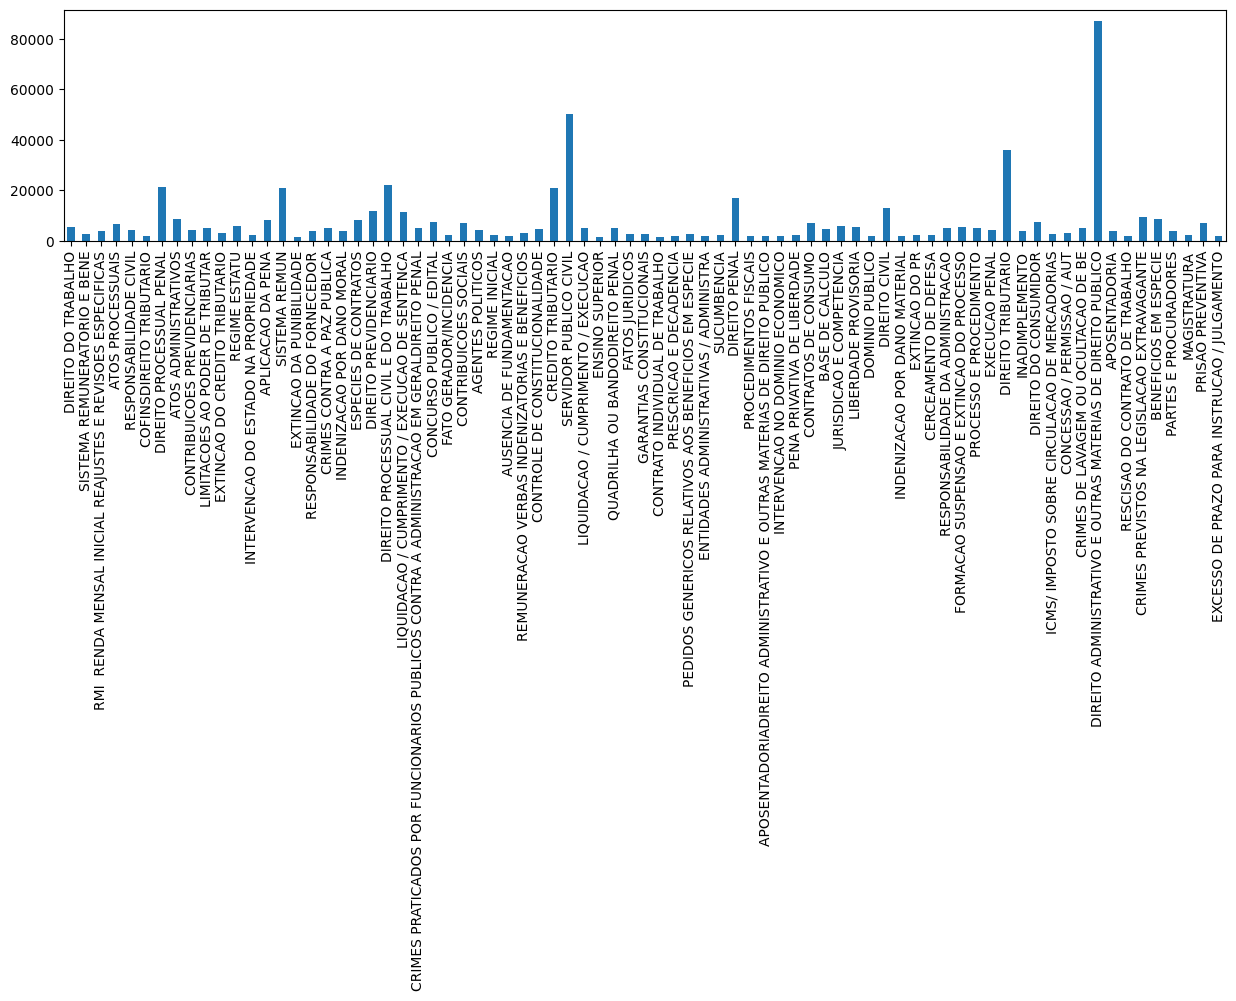

In [ ]:
# Distribuição das classes.
y_train.sum().plot.bar(figsize=(15, 3))
plt.show()

# Separando um conjunto de validação

In [ ]:
mskf = MultilabelStratifiedKFold(n_splits=2, shuffle=True, random_state=0)

splits = list(mskf.split(X_train, y_train))
train_index, val_index = splits[0]

X_train, X_val = X_train.loc[train_index], X_train.loc[val_index]
y_train, y_val = y_train.loc[train_index], y_train.loc[val_index]

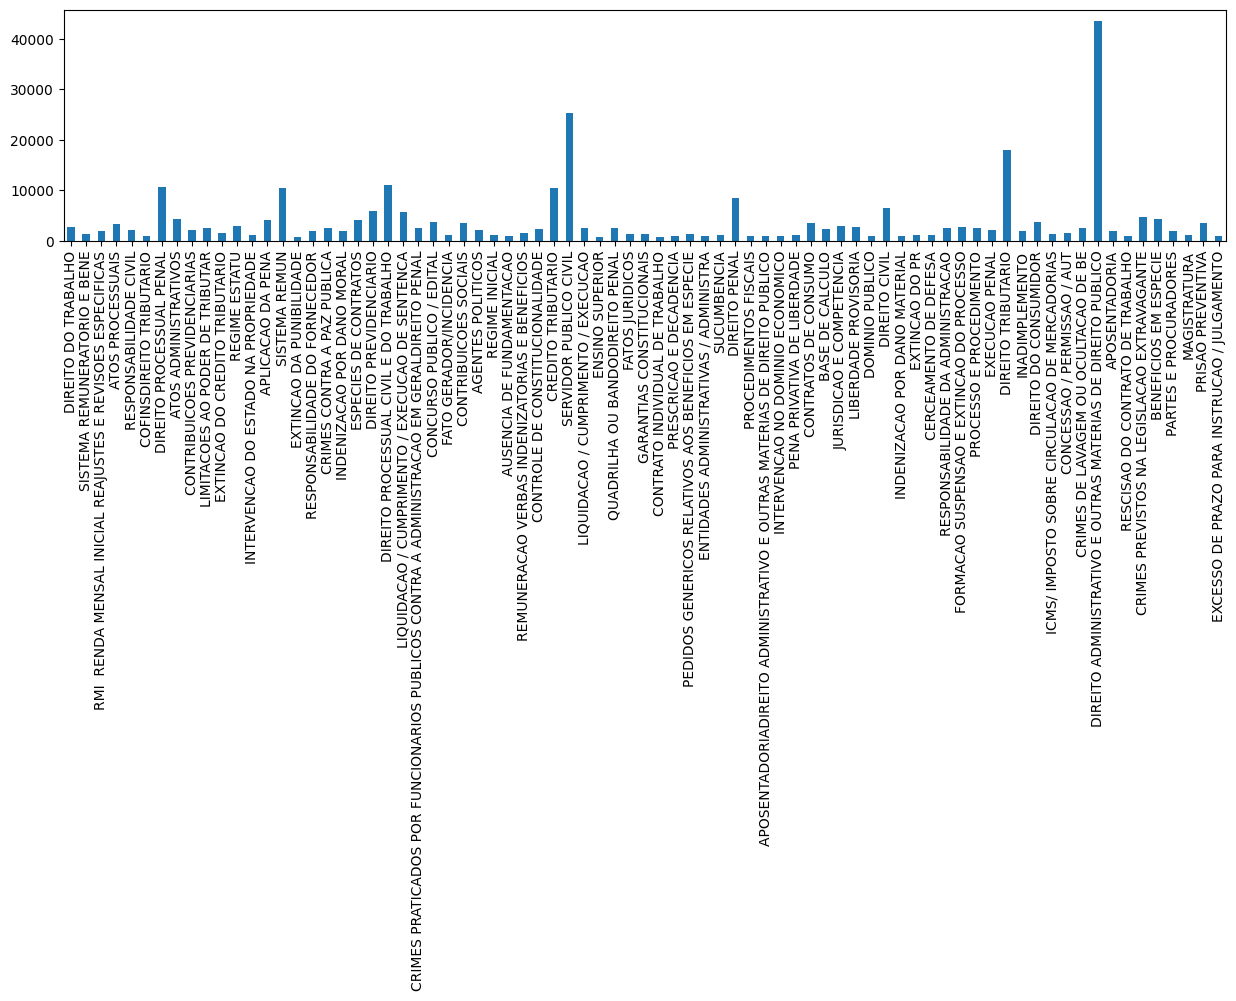

In [ ]:
# Distribuição das classes no conjunto de treino.
y_train.sum().plot.bar(figsize=(15, 3))
plt.show()

# Pré-processamento



In [ ]:
nltk.download("stopwords")

vectorizer = TfidfVectorizer(
    stop_words=stopwords.words("portuguese"),
    min_df=5
)

X_train_bow = vectorizer.fit_transform(X_train.texto.to_list())
X_val_bow = vectorizer.transform(X_val.texto.to_list())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
X_train_multilingual_embeddings = model.encode(
    X_train.texto.to_list(),
    show_progress_bar=True,
    normalize_embeddings=True
)

Batches:   0%|          | 0/3444 [00:00<?, ?it/s]

In [ ]:
X_val_multilingual_embeddings = model.encode(
    X_val.texto.to_list(),
    show_progress_bar=True,
    normalize_embeddings=True
)

Batches:   0%|          | 0/3446 [00:00<?, ?it/s]

In [ ]:
model = SentenceTransformer("pierreguillou/bert-base-cased-pt-lenerbr")

config.json:   0%|          | 0.00/893 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertModel were not initialized from the model checkpoint at pierreguillou/bert-base-cased-pt-lenerbr and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/530 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/438k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
X_train_pt_embeddings = model.encode(
    X_train.texto.to_list(),
    show_progress_bar=True,
    normalize_embeddings=True
)

Batches:   0%|          | 0/3444 [00:00<?, ?it/s]

In [ ]:
X_val_pt_embeddings = model.encode(
    X_val.texto.to_list(),
    show_progress_bar=True,
    normalize_embeddings=True
)

Batches:   0%|          | 0/3446 [00:00<?, ?it/s]

Treinamento dos Modelos

In [ ]:
class_weights = {}
for col in y_train.columns:
    weights = compute_class_weight(
        class_weight="balanced",
        classes=np.array([0, 1]),
        y=y_train[col].values
    )
    class_weights[col] = dict(enumerate(weights))

print("Pesos para cada classe:", class_weights)

Pesos para cada classe: {'DIREITO DO TRABALHO': {0: 0.5126885602881098, 1: 20.202786945361204}, 'SISTEMA REMUNERATORIO E BENE': {0: 0.5064486178906631, 1: 39.2679971489665}, 'RMI  RENDA MENSAL INICIAL REAJUSTES E REVISOES ESPECIFICAS': {0: 0.509026905166679, 1: 28.194984646878197}, 'ATOS PROCESSUAIS': {0: 0.5150804038893044, 1: 17.0778053316801}, 'RESPONSABILIDADE CIVIL': {0: 0.5101062007536827, 1: 25.23728813559322}, 'COFINSDIREITO TRIBUTARIO': {0: 0.50431606601796, 1: 58.42311770943797}, 'DIREITO PROCESSUAL PENAL': {0: 0.5535315985130111, 1: 5.170138888888889}, 'ATOS ADMINISTRATIVOS': {0: 0.5201476613984403, 1: 12.90838800374883}, 'CONTRIBUICOES PREVIDENCIARIAS': {0: 0.5100117567555058, 1: 25.470642625982432}, 'LIMITACOES AO PODER DE TRIBUTAR': {0: 0.5116220759079891, 1: 22.01078705553336}, 'EXTINCAO DO CREDITO TRIBUTARIO': {0: 0.5066954842269843, 1: 37.8385989010989}, 'REGIME ESTATU': {0: 0.5136349651783966, 1: 18.835213675213677}, 'INTERVENCAO DO ESTADO NA PROPRIEDADE': {0: 0.50548

In [ ]:
# Definir o número de atributos e classes
n_features = X_train_bow.shape[1]
n_classes = y_train.shape[1]

# Construção da rede neural
model_multilingual_embeddings = Sequential([
    Input(shape=(n_features,), sparse=True),
    Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(n_classes, activation="sigmoid")  # Camada de saída para multirrótulo
])

# Compilação do modelo
model_multilingual_embeddings.compile(
    optimizer=Adam(learning_rate=0.001),  # Taxa de aprendizado inicial ajustada
    loss="binary_crossentropy",  # Perda para multirrótulo
    metrics=["accuracy"]  # Métricas adicionais podem ser adicionadas
)

# Callbacks
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=10,  # Para evitar treinar por muito tempo
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=5,  # Reduz a taxa de aprendizado se o modelo parar de melhorar
    min_lr=1e-6
)

# Treinamento
history = model_multilingual_embeddings.fit(
    X_train_bow, y_train,
    validation_data=(X_val_bow, y_val),
    epochs=100,  # Aumentei o número de épocas, mas o EarlyStopping evita overfitting
    batch_size=32,
    class_weight=class_weights,  # Pesos ajustados para classes desbalanceadas
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100
 237/3444 ━━━━━━━━━━━━━━━━━━━━ 19:15 360ms/step - accuracy: 0.0401 - loss: 1.0236

KeyboardInterrupt: 